In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

%run train_model.ipynb
%run deepCNN.ipynb
%run data_handler.ipynb


# combines data and labels for all subjects except for the subject nr given. Returns data, labels
def combine_all_subjects(sub):
    data = None
    labels = None
    for subjectnr in range(1,11):
        if subjectnr is not sub:
            print("Loading subject nr ", subjectnr)
            temp_data, temp_desc = load_subject(subjectnr) # Load data, desc
            temp_data, temp_desc = get_innerspeech(temp_data, temp_desc) # Extract only IS trials
            temp_labels = extract_labels(temp_desc) # Pick out labels from description
            if data is None and labels is None:
                data = temp_data
                labels = temp_labels
            else:
                data = np.concatenate((data,temp_data))
                labels = np.concatenate((labels,temp_labels)).astype(int)
    return data, labels



Loading subject nr  1
Loading subject nr  2
Loading subject nr  3
Loading subject nr  5
Loading subject nr  6
Loading subject nr  7
Loading subject nr  8
Loading subject nr  9
Loading subject nr  10
1996
1996
Split info:
[395, 395, 395, 395] 
 [54, 54, 54, 54] 
 [50, 50, 50, 50]
25.0 %  25.0 %  25.0 %  25.0 % 
25.0 %  25.0 %  25.0 %  25.0 % 
25.0 %  25.0 %  25.0 %  25.0 % 


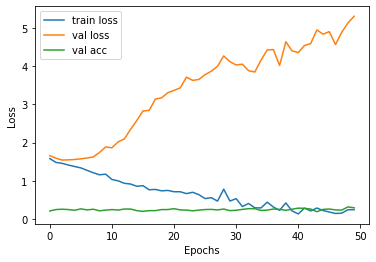

Best model found on epoch:  48


In [2]:
# Will take a subject number and pretrain a model with all data except that subject, then save the model as pretrained_DeepCNN_subjectX.
def pre_train_Deep(sub):
    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
    d, l = combine_all_subjects(sub)
    
    train_data, val_data, test_data, train_labels, val_labels, test_labels = split_data(d,l)
    split_info(train_data, val_data, test_data, train_labels, val_labels, test_labels)
    train_data, val_data, test_data, train_labels, val_labels, test_labels = to_device(train_data, val_data, test_data, train_labels, val_labels, test_labels, device)

    model = DeepCNN(hz = 254, interval = "full", bias = False, dropout = 0.5).float().to(device)

    loss_func = nn.NLLLoss()
    op = optim.Adam(params = model.parameters(), lr = 0.001)
    train_model(model, train_data, train_labels, val_data, val_labels, epochs= 50, batch_size=4, loss_func = loss_func, optimizer=op)
    print(accuracy_check(model, train_data, train_labels))
    print(accuracy_check(model, val_data, val_labels))
    print(accuracy_check(model, test_data, test_labels))
    save_model(model, "pretrained_DeepCNN_subject{}".format())

# Will take a subject number and pretrain a model with all data except that subject, then save the model as pretrained_ShallowCNN_subjectX.
def pre_train_Shallow(sub):
    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
    d, l = combine_all_subjects(sub)
    
    train_data, val_data, test_data, train_labels, val_labels, test_labels = split_data(d,l)
    split_info(train_data, val_data, test_data, train_labels, val_labels, test_labels)
    train_data, val_data, test_data, train_labels, val_labels, test_labels = to_device(train_data, val_data, test_data, train_labels, val_labels, test_labels, device)

    model = ShallowCNN(hz = 254, interval = "full", bias = True, dropout = 0.001).float().to(device)

    loss_func = nn.NLLLoss()
    op = optim.Adam(params = model.parameters(), lr = 0.001)
    train_model(model, train_data, train_labels, val_data, val_labels, epochs= 50, batch_size=4, loss_func = loss_func, optimizer=op)
    print(accuracy_check(model, train_data, train_labels))
    print(accuracy_check(model, val_data, val_labels))
    print(accuracy_check(model, test_data, test_labels))
    save_model(model, "pretrained_ShallowCNN_subject{}".format())

# Will take a subject number and pretrain a model with all data except that subject, then save the model as pretrained_EEGNet_subjectX.
def pre_train_EEGNet(sub):
    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
    d, l = combine_all_subjects(sub)
    
    train_data, val_data, test_data, train_labels, val_labels, test_labels = split_data(d,l)
    split_info(train_data, val_data, test_data, train_labels, val_labels, test_labels)
    train_data, val_data, test_data, train_labels, val_labels, test_labels = to_device(train_data, val_data, test_data, train_labels, val_labels, test_labels, device)

    model = EEGNet(hz = 254, interval = "full", bias = False, dropout = 0.5).float().to(device)

    loss_func = nn.NLLLoss()
    op = optim.Adam(params = model.parameters(), lr = 0.001)
    train_model(model, train_data, train_labels, val_data, val_labels, epochs= 50, batch_size=4, loss_func = loss_func, optimizer=op)
    print(accuracy_check(model, train_data, train_labels))
    print(accuracy_check(model, val_data, val_labels))
    print(accuracy_check(model, test_data, test_labels))
    save_model(model, "pretrained_EEGNet_subject{}".format())

In [10]:
for i in range(1,11):
    pre_train_Deep(i)


NameError: name 'pre_train_Deep' is not defined

In [ ]:
for i in range(1,11):
    pre_train_Shallow(i)

In [ ]:
for i in range(1,11):
    pre_train_EEGNet(i)